In [1]:
# Qiskit module
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.tools.monitor import job_monitor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_casablanca')

In [3]:
properties = backend.properties()
configuration = backend.configuration()

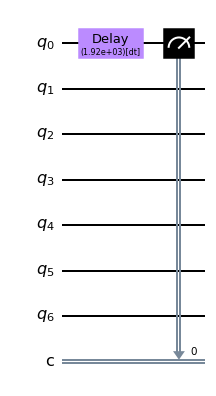

In [4]:
circuit = QuantumCircuit(7, 1)
circuit.delay(64*30, unit="dt", qarg=0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

In [5]:
execute_kwargs = {
    "initial_layout": list(range(7)),
    "shots": 8192,
    "optimization_level": 0,
    "job_share_level": "global",
}
#job_circuit = execute(circuit, backend, **execute_kwargs)
#job_circuit = backend.retrieve_job("604a9570473d7476ae530369")
# Delay = 30*64 dt and share_level = "global"
job_circuit = backend.retrieve_job("604c98a5a2ec4e8b3f0138d8")
print(job_circuit.job_id())
job_monitor(job_circuit)

604c98a5a2ec4e8b3f0138d8
Job Status: job has successfully run


In [6]:
from qiskit import transpile, schedule
schd = schedule(transpile(circuit, backend, optimization_level=0), backend)
#job_schd = execute(schd, backend, **execute_kwargs)
# Delay = 100 dt
#job_schd = backend.retrieve_job("604aa40a503af95ac3475cc2")
# Delay = 16*30
#job_schd = backend.retrieve_job("604b97f512bd78662bf66b4b")
# Delay = 64*30
#job_schd = backend.retrieve_job("604bb872cebc284424c36858")
# Delay = 30*64 dt and share_level = "global"
job_schd = backend.retrieve_job("604c98bf80b9b70466cf138d")
print(job_schd.job_id())
job_monitor(job_schd)

604c98bf80b9b70466cf138d
Job Status: job has successfully run


In [7]:
result_circuit = job_circuit.result()
result_schd = job_schd.result()

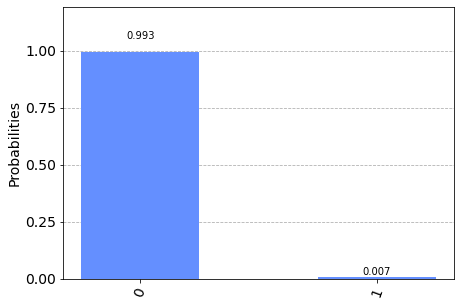

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(result_circuit.get_counts())

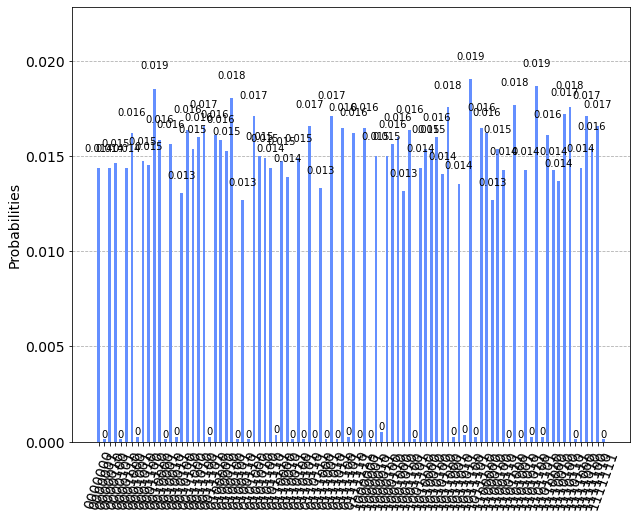

In [9]:
plot_histogram(result_schd.get_counts(), figsize=(10, 8))

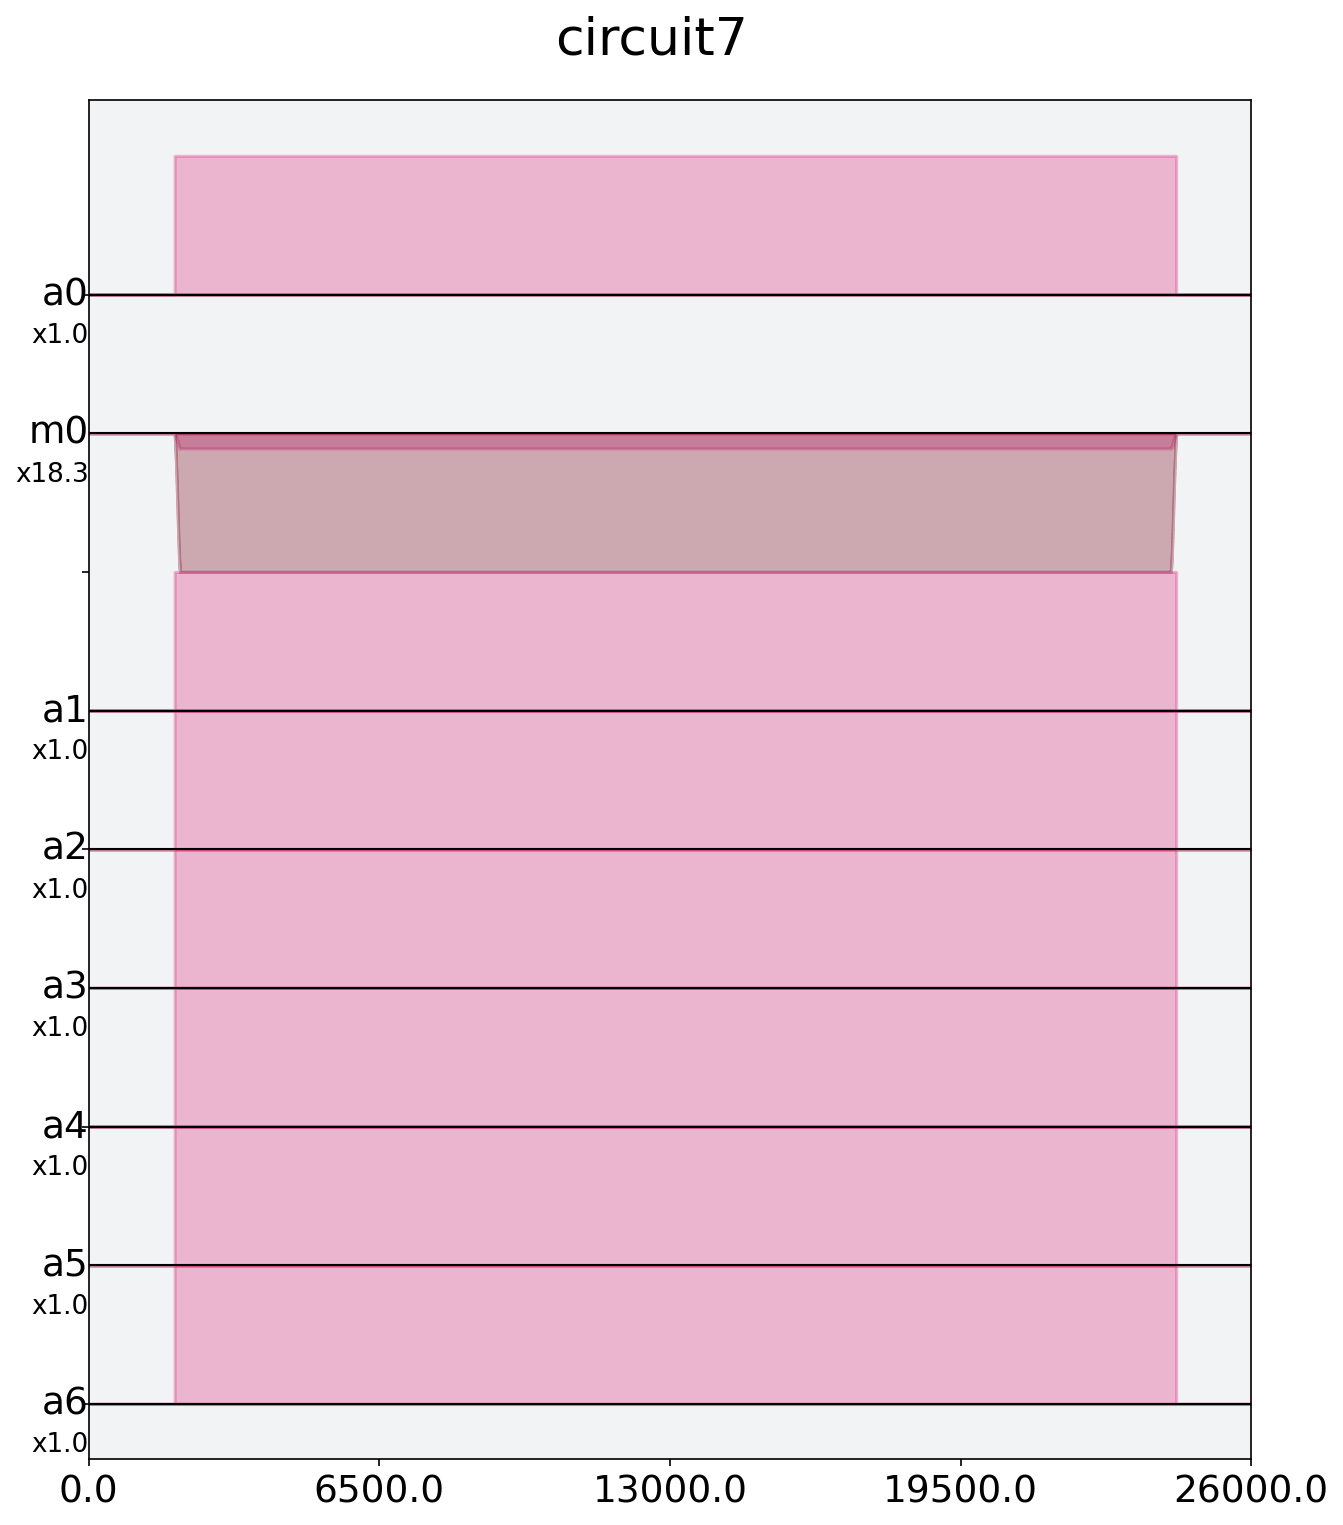

In [10]:
from qiskit.visualization import pulse_drawer

pulse_drawer(schd)